# Opening and formatting data

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
names_path = '/content/drive/MyDrive/Wisconsin Diagnostic Breast Cancer (WDBC) Dataset/wdbc.names'

with open(names_path, 'r') as file:
    names_text = file.read()

print(names_text[:1500])  # Show the first 1500 characters

1. Title: Wisconsin Diagnostic Breast Cancer (WDBC)

2. Source Information

a) Creators: 

	Dr. William H. Wolberg, General Surgery Dept., University of
	Wisconsin,  Clinical Sciences Center, Madison, WI 53792
	wolberg@eagle.surgery.wisc.edu

	W. Nick Street, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	street@cs.wisc.edu  608-262-6619

	Olvi L. Mangasarian, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	olvi@cs.wisc.edu 

b) Donor: Nick Street

c) Date: November 1995

3. Past Usage:

first usage:

	W.N. Street, W.H. Wolberg and O.L. Mangasarian 
	Nuclear feature extraction for breast tumor diagnosis.
	IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science
	and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

OR literature:

	O.L. Mangasarian, W.N. Street and W.H. Wolberg. 
	Breast cancer diagnosis and prognosis via linear programming. 
	Operations Research, 43(4), pag

In [102]:
import pandas as pd

data_path = '/content/drive/MyDrive/Wisconsin Diagnostic Breast Cancer (WDBC) Dataset/wdbc.data'

# Define full column names
base_features = [
    "radius", "texture", "perimeter", "area", "smoothness",
    "compactness", "concavity", "concave_points", "symmetry", "fractal_dimension"
]

stat_types = ["mean", "se", "worst"]

columns = ["ID", "Diagnosis"] + [f"{feat}_{stat}" for stat in stat_types for feat in base_features]

# Load dataset
df = pd.read_csv(data_path, header=None, names=columns)
df.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [103]:
df.shape

(569, 32)

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

Unique values in Diagnosis column:
['M' 'B']

Class distribution:
Diagnosis
B    357
M    212
Name: count, dtype: int64


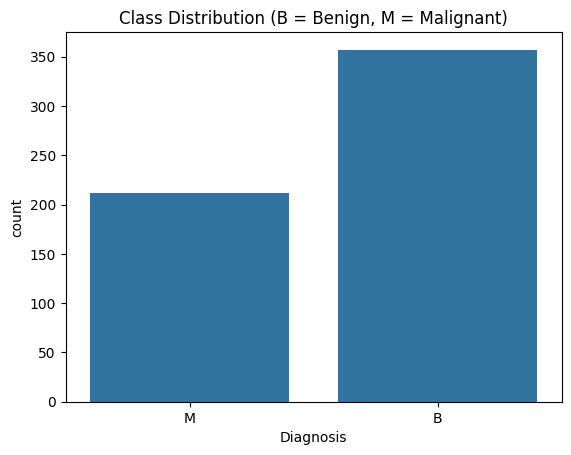

In [105]:
# Check unique values in the target column
print("Unique values in Diagnosis column:")
print(df["Diagnosis"].unique())

# Count class distribution
print("\nClass distribution:")
print(df["Diagnosis"].value_counts())

# Optional: Visualize class distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="Diagnosis")
plt.title("Class Distribution (B = Benign, M = Malignant)")
plt.show()


THE DATASET IS NOT BALANCED

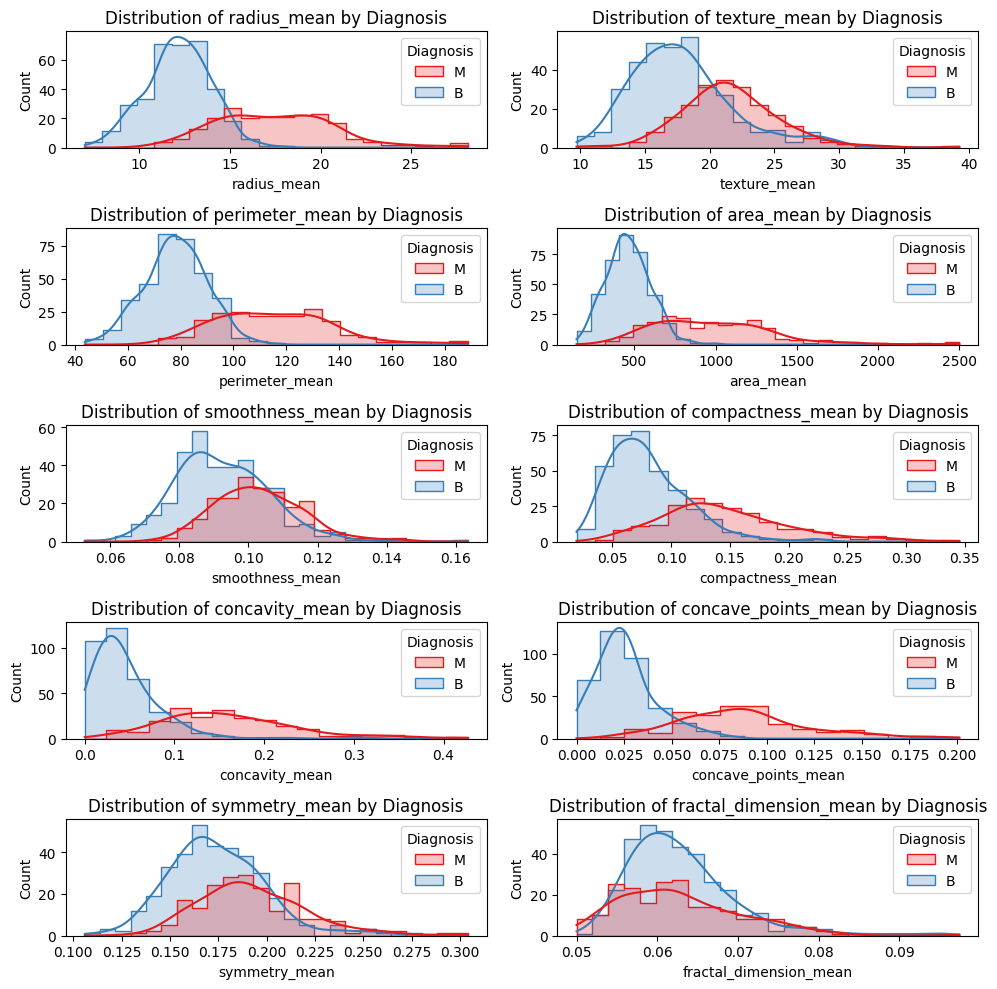

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select first 10 features
features1 = df.columns[2:12]  # Skip ID and Diagnosis

plt.figure(figsize=(10, 10))

for i, feature in enumerate(features1, 1):
    plt.subplot(5, 2, i)
    sns.histplot(data=df, x=feature, hue="Diagnosis", kde=True, element="step", palette="Set1", common_norm=False)
    plt.title(f'Distribution of {feature} by Diagnosis')
    plt.tight_layout()

plt.show()


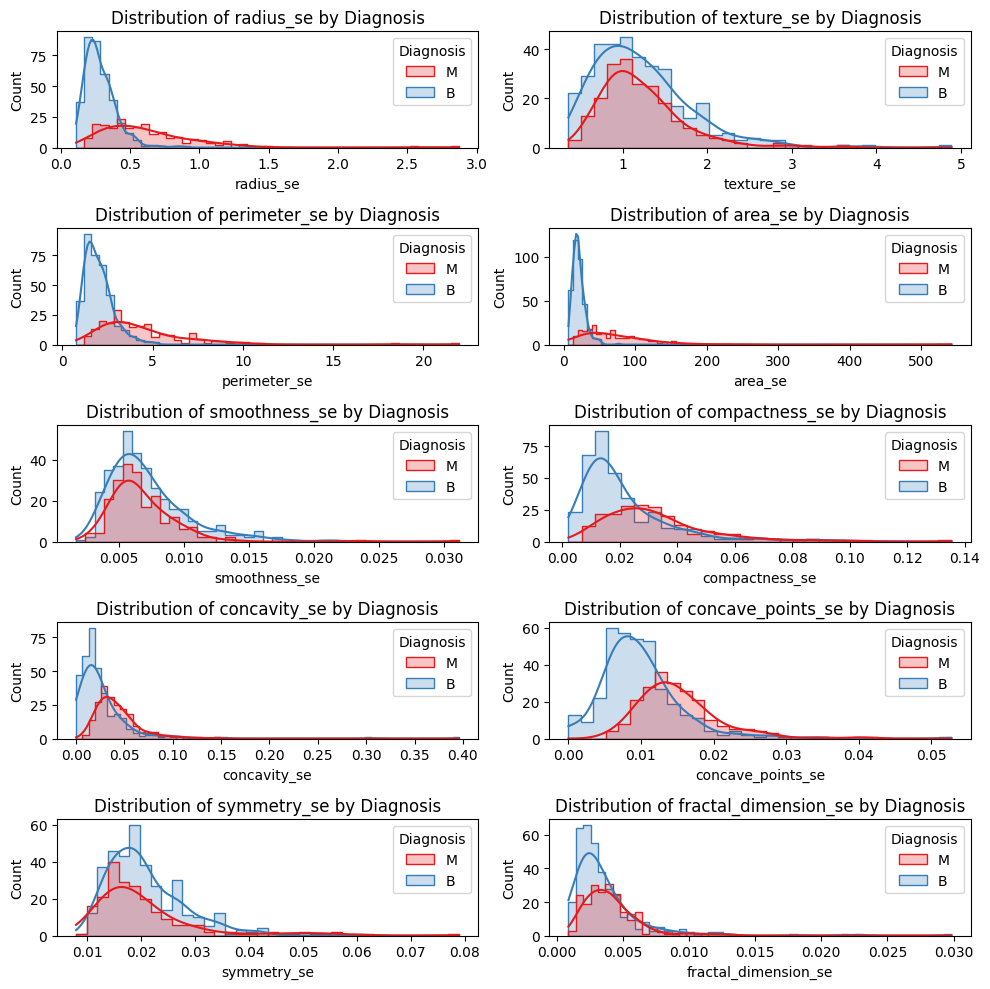

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the next 10 features
features1 = df.columns[12:22]

plt.figure(figsize=(10, 10))

for i, feature in enumerate(features1, 1):
    plt.subplot(5, 2, i)
    sns.histplot(data=df, x=feature, hue="Diagnosis", kde=True, element="step", palette="Set1", common_norm=False)
    plt.title(f'Distribution of {feature} by Diagnosis')
    plt.tight_layout()

plt.show()


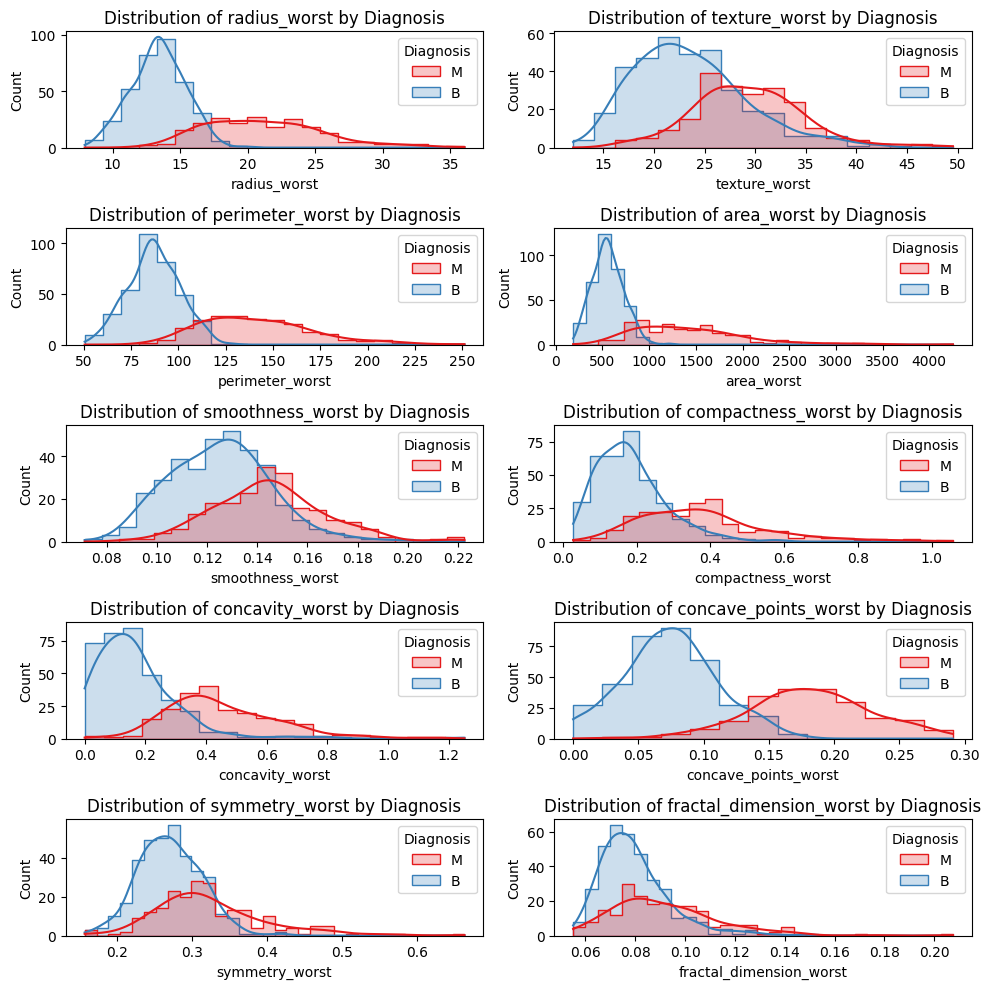

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select remaining features
features1 = df.columns[22:]

plt.figure(figsize=(10, 10))

for i, feature in enumerate(features1, 1):
    plt.subplot(5, 2, i)
    sns.histplot(data=df, x=feature, hue="Diagnosis", kde=True, element="step", palette="Set1", common_norm=False)
    plt.title(f'Distribution of {feature} by Diagnosis')
    plt.tight_layout()

plt.show()


**Prepare sets and format target, positive class for malignant tumors**

In [109]:
# Features and target
X = df.drop(columns=["ID", "Diagnosis"])
y = df["Diagnosis"]

# Manual conversion: 'M' → 1, 'B' → 0
y_converted = []
for label in y:
    if label == 'M':
        y_converted.append(1)
    elif label == 'B':
        y_converted.append(0)
    else:
        raise ValueError(f"Unexpected label: {label}")

y = np.array(y_converted)  # Ensure it's a NumPy array

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


# FIRST MODEL

In [110]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000, random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



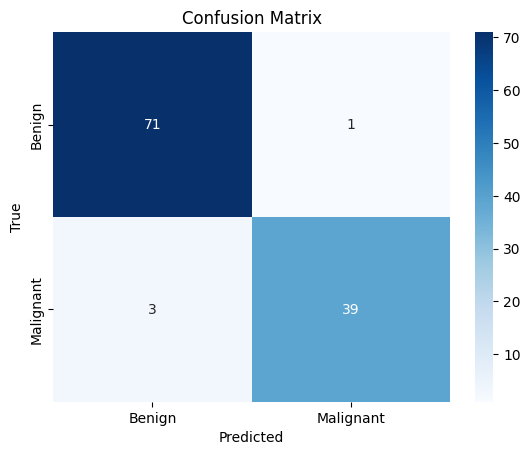

In [111]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

F1-score = 2 * (Precision * Recall) / (Precision + Recall)

**Testing if oversampling unbalanced class has some effect**

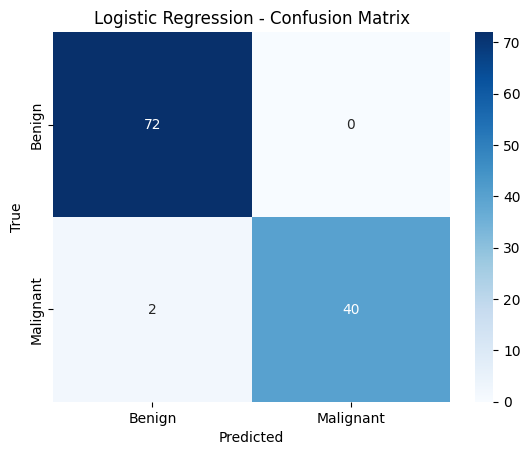

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

      Benign       0.97      1.00      0.99        72
   Malignant       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

pipeline_lr = ImbPipeline([
    ("smote", SMOTE(random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(C=0.1, solver="lbfgs", max_iter=1000, random_state=42))
])

pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr, target_names=["Benign", "Malignant"]))


# IMPROVED
Comparison with other common models

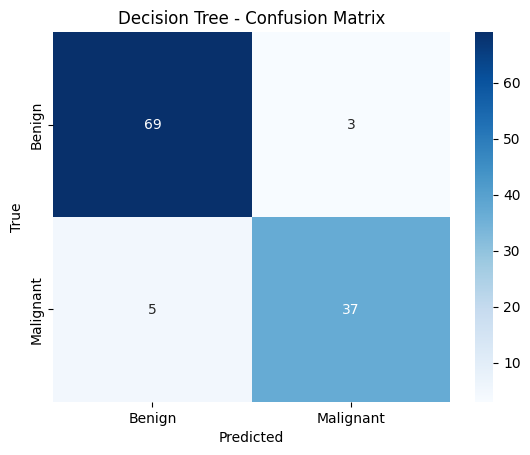

Classification Report (Decision Tree):
              precision    recall  f1-score   support

      Benign       0.93      0.96      0.95        72
   Malignant       0.93      0.88      0.90        42

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



In [113]:
from sklearn.tree import DecisionTreeClassifier

pipeline_dt = ImbPipeline([
    ("smote", SMOTE(random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", DecisionTreeClassifier(max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    criterion='entropy',
    class_weight='balanced',
    random_state=42
))
])

pipeline_dt.fit(X_train, y_train)
y_pred_dt = pipeline_dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt, target_names=["Benign", "Malignant"]))


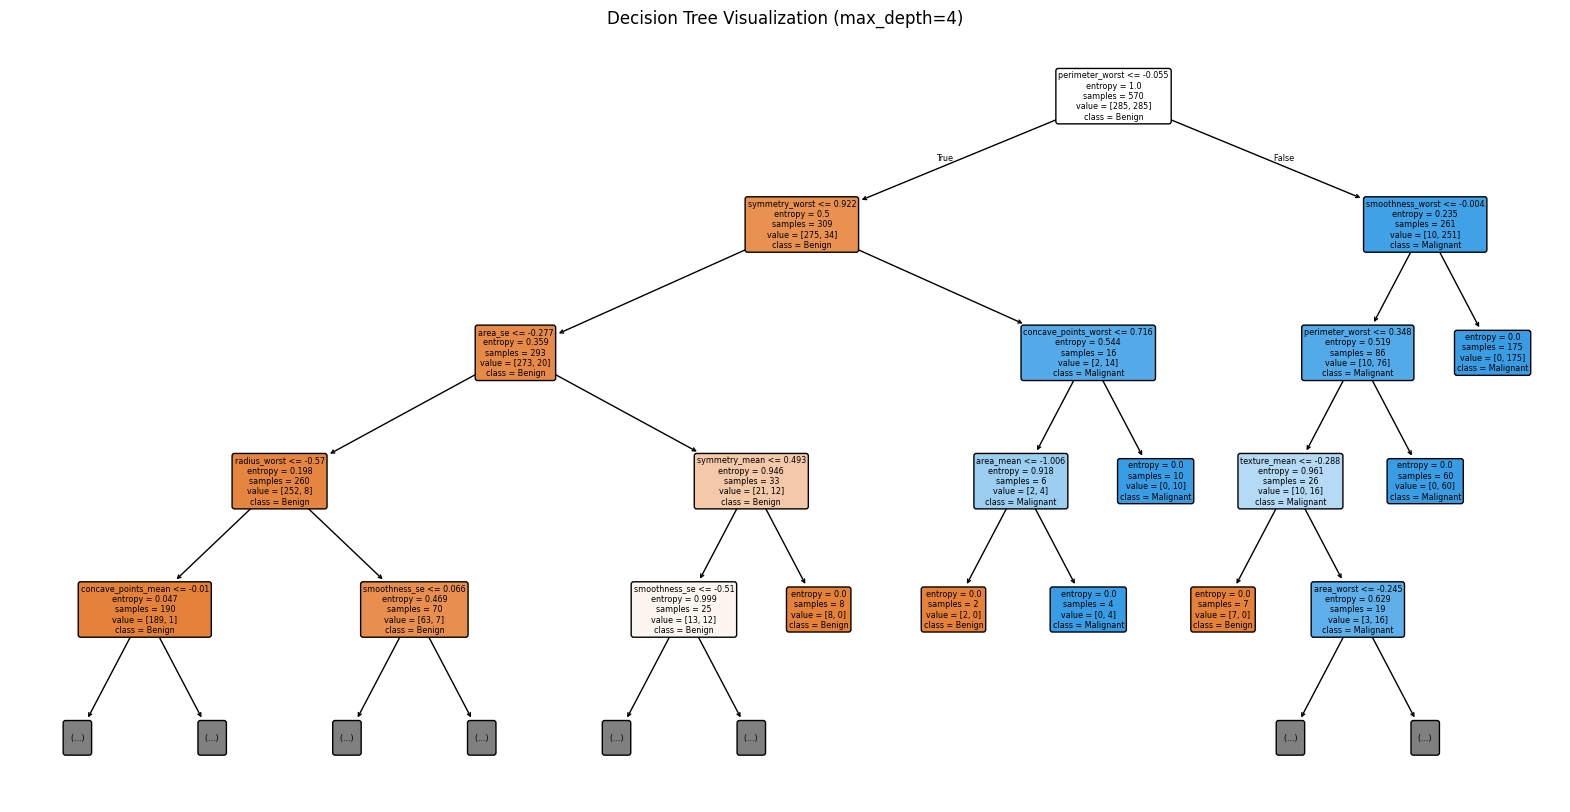

In [114]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extract trained Decision Tree from the pipeline
dt_model = pipeline_dt.named_steps['clf']

# Plot the tree (use a limited depth for clarity)
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=["Benign", "Malignant"],
    filled=True,
    rounded=True,
    max_depth=4  # Limit depth for readability
)
plt.title("Decision Tree Visualization (max_depth=4)")
plt.show()


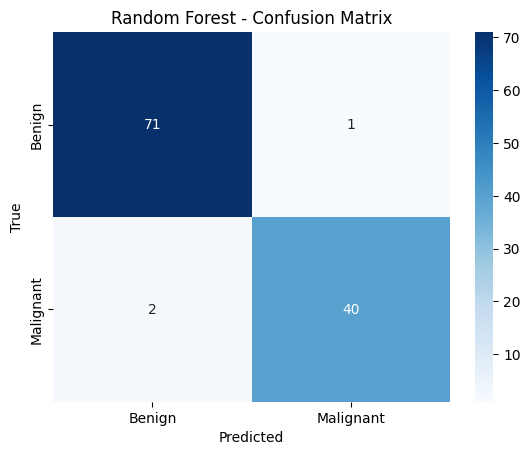

Classification Report (Random Forest):
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        72
   Malignant       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [115]:
from sklearn.ensemble import RandomForestClassifier

pipeline_rf = ImbPipeline([
    ("smote", SMOTE(random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(n_estimators=200,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
))
])

pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=["Benign", "Malignant"]))


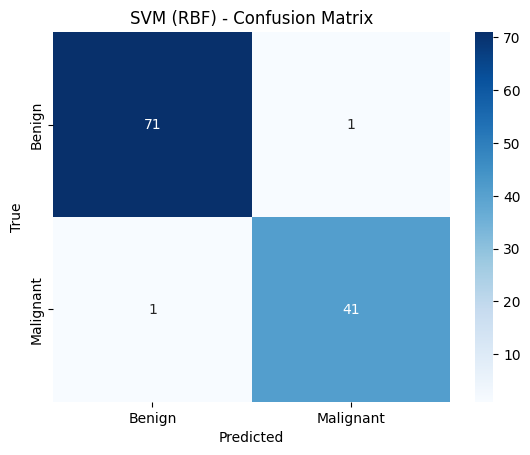

Classification Report (SVM):
              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99        72
   Malignant       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [116]:
from sklearn.svm import SVC

pipeline_svm = ImbPipeline([
    ("smote", SMOTE(random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel='rbf',
    C=1,
    gamma='scale',
    class_weight='balanced',
    probability=True,  # Needed for ROC curves
    random_state=42
))
])

pipeline_svm.fit(X_train, y_train)
y_pred_svm = pipeline_svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("SVM (RBF) - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm, target_names=["Benign", "Malignant"]))


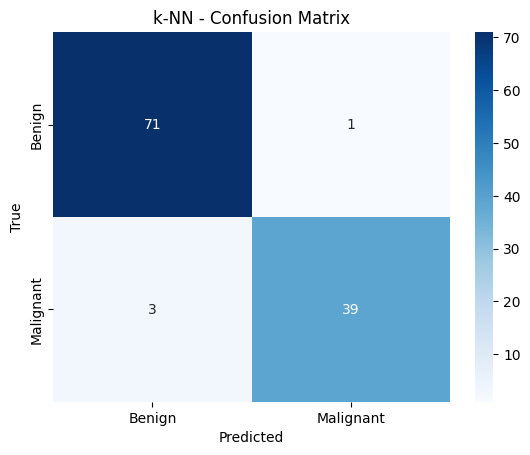

Classification Report (k-NN):
              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        72
   Malignant       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [117]:
from sklearn.neighbors import KNeighborsClassifier

pipeline_knn = ImbPipeline([
    ("smote", SMOTE(random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", KNeighborsClassifier(n_neighbors=8,
    weights='distance',
    metric='euclidean'
))
])

pipeline_knn.fit(X_train, y_train)
y_pred_knn = pipeline_knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("k-NN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("Classification Report (k-NN):")
print(classification_report(y_test, y_pred_knn, target_names=["Benign", "Malignant"]))


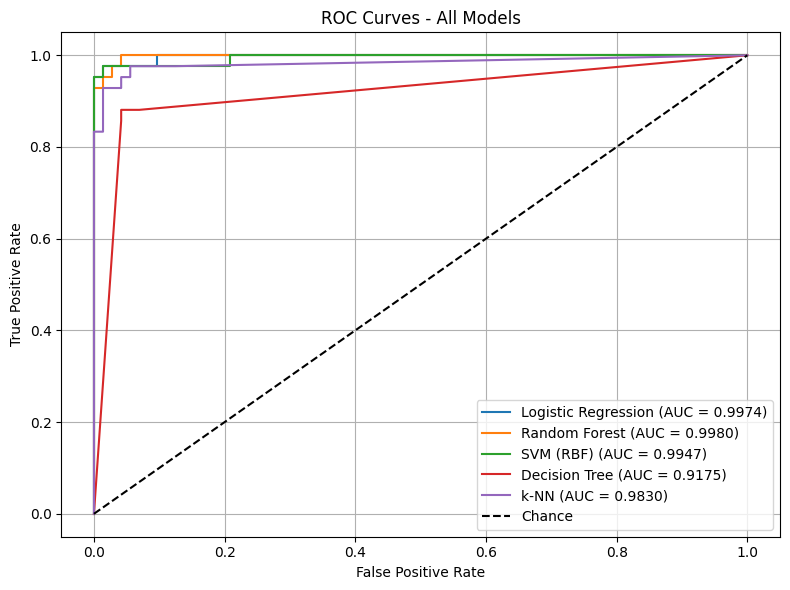

In [118]:
from sklearn.metrics import roc_curve, auc

# Probabilities from each trained model
y_proba_lr = pipeline_lr.predict_proba(X_test)[:, 1]
y_proba_rf = pipeline_rf.predict_proba(X_test)[:, 1]
y_proba_svm = pipeline_svm.predict_proba(X_test)[:, 1]
y_proba_dt = pipeline_dt.predict_proba(X_test)[:, 1]
y_proba_knn = pipeline_knn.predict_proba(X_test)[:, 1]

# Plot ROC curves
plt.figure(figsize=(8, 6))

for y_proba, label in zip(
    [y_proba_lr, y_proba_rf, y_proba_svm, y_proba_dt, y_proba_knn],
    ["Logistic Regression", "Random Forest", "SVM (RBF)", "Decision Tree", "k-NN"]
):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.4f})")

plt.plot([0, 1], [0, 1], "k--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - All Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


#Optimization of parameters for the 3 most promising:
**Logistic regression,
Random forest,
 SVM**

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

pipeline_lr = ImbPipeline([
    ("smote", SMOTE(random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000, random_state=42))
])

param_grid_lr = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__penalty': ['l2'],
    'clf__solver': ['liblinear'],
    'clf__class_weight': [None, 'balanced']
}

grid_lr = GridSearchCV(pipeline_lr, param_grid=param_grid_lr, scoring='recall', cv=5, n_jobs=-1, verbose=1)
grid_lr.fit(X_train, y_train)

print("Best Logistic Regression Params:", grid_lr.best_params_)
print("Best AUC:", grid_lr.best_score_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Logistic Regression Params: {'clf__C': 1, 'clf__class_weight': None, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best AUC: 0.9470588235294117


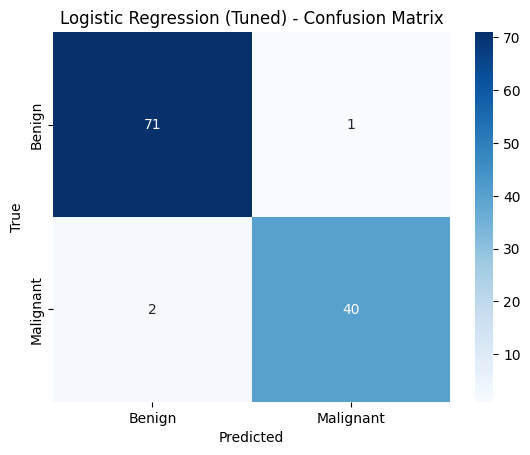

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        72
   Malignant       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [120]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_lr = grid_lr.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Malignant"],
            yticklabels=["Benign", "Malignant"])
plt.title("Logistic Regression (Tuned) - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr, target_names=["Benign", "Malignant"]))


In [121]:
from sklearn.ensemble import RandomForestClassifier

pipeline_rf = ImbPipeline([
    ("smote", SMOTE(random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(random_state=42))
])

param_grid_rf = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2],
    'clf__max_features': ['sqrt', 'log2'],
    'clf__class_weight': [None, 'balanced']
}

grid_rf = GridSearchCV(pipeline_rf, param_grid=param_grid_rf, scoring='recall', cv=5, n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

print("Best Random Forest Params:", grid_rf.best_params_)
print("Best AUC:", grid_rf.best_score_)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Random Forest Params: {'clf__class_weight': None, 'clf__max_depth': None, 'clf__max_features': 'log2', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
Best AUC: 0.9470588235294117


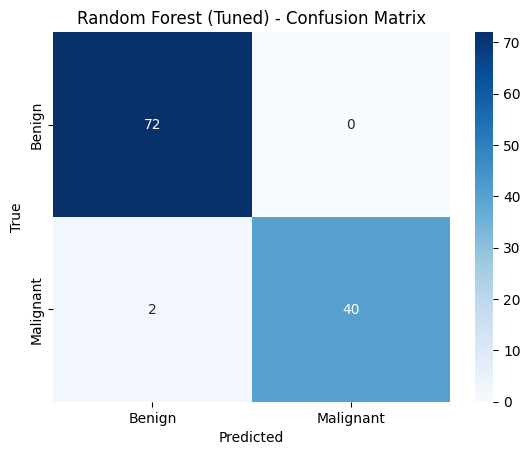

Classification Report (Random Forest):
              precision    recall  f1-score   support

      Benign       0.97      1.00      0.99        72
   Malignant       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [122]:
y_pred_rf = grid_rf.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Malignant"],
            yticklabels=["Benign", "Malignant"])
plt.title("Random Forest (Tuned) - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=["Benign", "Malignant"]))


In [123]:
from sklearn.svm import SVC

pipeline_svm = ImbPipeline([
    ("smote", SMOTE(random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", SVC(probability=True, random_state=42))
])

param_grid_svm = {
    'clf__C': [0.1, 1, 10],
    'clf__gamma': ['scale', 0.01, 0.1],
    'clf__class_weight': [None, 'balanced']
}

grid_svm = GridSearchCV(pipeline_svm, param_grid=param_grid_svm, scoring='recall', cv=5, n_jobs=-1, verbose=1)
grid_svm.fit(X_train, y_train)

print("Best SVM Params:", grid_svm.best_params_)
print("Best AUC:", grid_svm.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best SVM Params: {'clf__C': 1, 'clf__class_weight': None, 'clf__gamma': 'scale'}
Best AUC: 0.9647058823529411


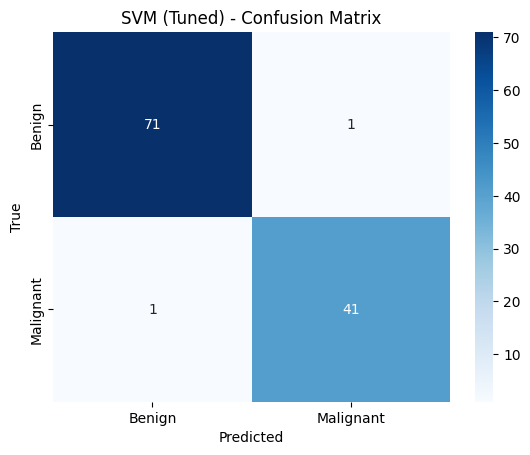

Classification Report (SVM):
              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99        72
   Malignant       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [124]:
y_pred_svm = grid_svm.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Malignant"],
            yticklabels=["Benign", "Malignant"])
plt.title("SVM (Tuned) - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm, target_names=["Benign", "Malignant"]))


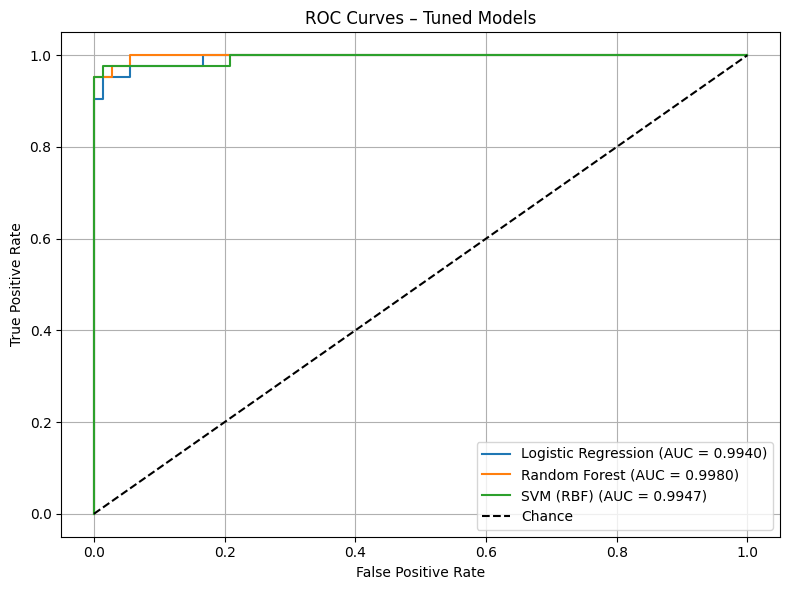

In [125]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probability estimates (class 1 = malignant)
y_proba_lr = grid_lr.best_estimator_.predict_proba(X_test)[:, 1]
y_proba_rf = grid_rf.best_estimator_.predict_proba(X_test)[:, 1]
y_proba_svm = grid_svm.best_estimator_.predict_proba(X_test)[:, 1]

# Plot ROC curves
plt.figure(figsize=(8, 6))

for y_proba, label in zip(
    [y_proba_lr, y_proba_rf, y_proba_svm],
    ["Logistic Regression", "Random Forest", "SVM (RBF)"]
):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.4f})")

# Add reference line and formatting
plt.plot([0, 1], [0, 1], 'k--', label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Tuned Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

**EXPLAINABILITY OF BEST MODELS**

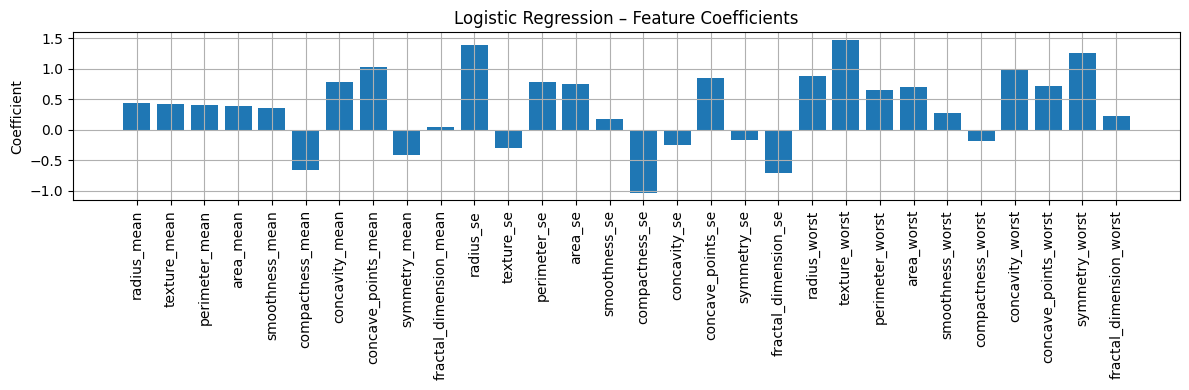

In [126]:
import matplotlib.pyplot as plt
import pandas as pd

# Get features and coefficients
feature_names = X.columns
coefs = grid_lr.best_estimator_.named_steps['clf'].coef_[0]

# Bar plot (original order)
plt.figure(figsize=(12, 4))
plt.bar(feature_names, coefs)
plt.xticks(rotation=90)
plt.ylabel("Coefficient")
plt.title("Logistic Regression – Feature Coefficients")
plt.grid(True)
plt.tight_layout()
plt.show()


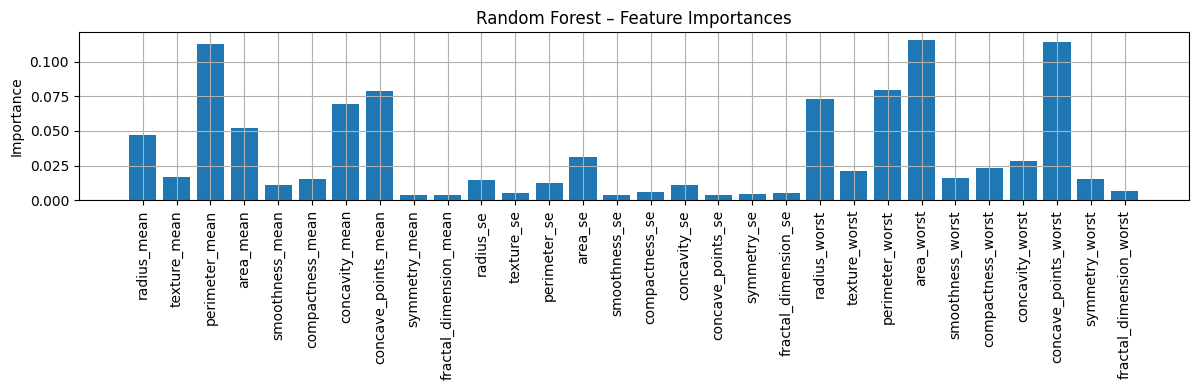

In [127]:
importances = grid_rf.best_estimator_.named_steps['clf'].feature_importances_
feature_names = X.columns

# Bar plot (original order)
plt.figure(figsize=(12, 4))
plt.bar(feature_names, importances)
plt.xticks(rotation=90)
plt.ylabel("Importance")
plt.title("Random Forest – Feature Importances")
plt.grid(True)
plt.tight_layout()
plt.show()


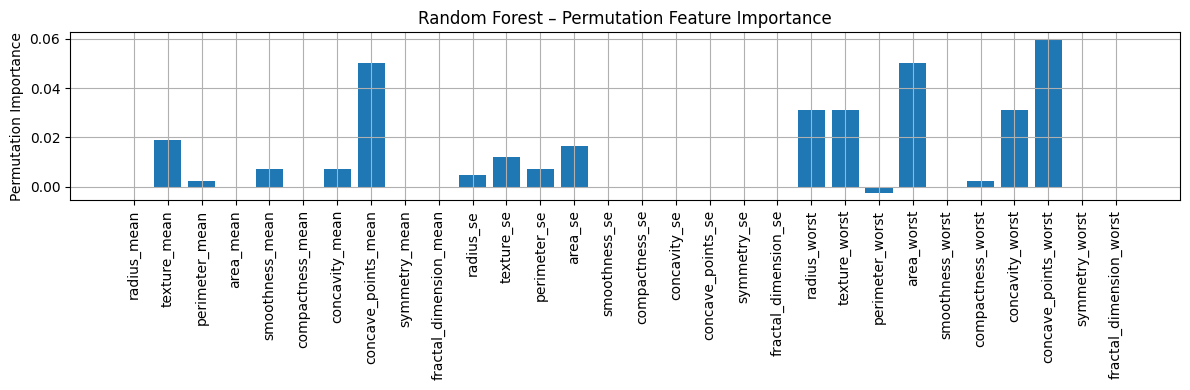

In [128]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# Extract fitted pipeline and model
pipeline = grid_rf.best_estimator_
X_test_scaled = pipeline.named_steps['scaler'].transform(X_test)
clf = pipeline.named_steps['clf']

# Compute permutation importance (on scaled data)
result = permutation_importance(
    clf, X_test_scaled, y_test,
    n_repeats=10,
    random_state=42,
    scoring='recall'
)

# Plot
feature_names = X.columns
importances = result.importances_mean

plt.figure(figsize=(12, 4))
plt.bar(feature_names, importances)
plt.xticks(rotation=90)
plt.ylabel("Permutation Importance")
plt.title("Random Forest – Permutation Feature Importance")
plt.grid(True)
plt.tight_layout()
plt.show()
